# Random Forest x IRIS 

In [3]:
import numpy as np
import pandas as pd


### Importer le dataset IRIS 

In [4]:
url = "/home/bennis/Documents/greta/datasets_dallard/iris.csv"

In [5]:
datairis = pd.read_csv(url)

In [6]:
datairis

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
datairis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


La colonne species est de type Objet, les données des autres colonnes de type float

### Faite un dataFrame et renommer les colonnes 

In [8]:
datairis.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

On utilise la méthode rename de la classe Pandas pour renommer les colonnes

In [9]:
datairis = datairis.rename(columns={'sepal_length':'sl','sepal_width':'sw', 'petal_length':'pl', 'petal_width':'pw'})

In [37]:
datairis.columns

Index(['sl', 'sw', 'pl', 'pw', 'species'], dtype='object')

### Définir les variables features et la target & effectuer un split 

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
label_encoder = LabelEncoder()

On va donc labelliser la colonne species (variable discrète nominale) afin d'avoir des éléments species de type int que l'on pourra hiérarchiser et trier

In [36]:
species_label_encoder = LabelEncoder()
datairis.species=species_label_encoder.fit_transform(datairis.species)
datairis

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
datairis[["species"]] = datairis[["species"]].apply(pd.to_numeric)

In [14]:
datairis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sl       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   species  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


On va définir les features et la target

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
features = ['sl', 'sw', 'pl', 'pw']
target = ['species']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(datairis[features],datairis[target],test_size=0.3)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 1), (45, 1))

L'échantillon x_train réduit de 150 à 105 lignes pourra donc servir à l'entraînement des données,l'échantillon x_test, passé de 150 à 45 lignes pour les test.

In [19]:
x_train.head(), x_test.head()

(      sl   sw   pl   pw
 9    4.9  3.1  1.5  0.1
 146  6.3  2.5  5.0  1.9
 28   5.2  3.4  1.4  0.2
 103  6.3  2.9  5.6  1.8
 121  5.6  2.8  4.9  2.0,
       sl   sw   pl   pw
 31   5.4  3.4  1.5  0.4
 44   5.1  3.8  1.9  0.4
 6    4.6  3.4  1.4  0.3
 138  6.0  3.0  4.8  1.8
 148  6.2  3.4  5.4  2.3)

### Entrainer le classifieur 

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
#affichage des parametres par defaut 
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [21]:
model = rf.fit(x_train, y_train)
print(model)

RandomForestRegressor(random_state=42)


/tmp/ipykernel_10590/733705064.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rf.fit(x_train, y_train)


### Afficher l'accuracy de votre classifieurs 

In [22]:
model.score(x_test,y_test)

0.9717446091644205

### Analyser votre classifieur, que voyez vous ? 

97% de fiabilité du test Notre split est donc parfaitement adapté à notre analyse
bien que l'on ait réduit la taille de l'échantillon.

### Afficher les features importances

In [23]:
feature_important = pd.Series(rf.feature_importances_,index=features).sort_values()
feature_important

sl    0.006124
sw    0.007686
pw    0.491087
pl    0.495103
dtype: float64

Les features importants sont pl et pw

### Afficher graphiquement les features importances  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


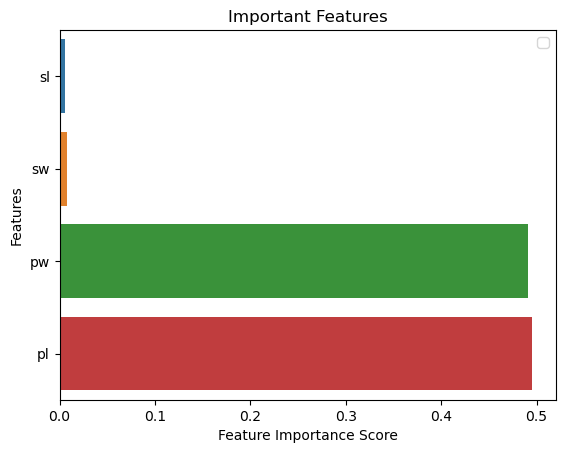

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.barplot(x=feature_important, y=feature_important.index)


plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()

### Entrainer votre classifieurs avec moins de features

In [ ]:
En regardant les données de plus près, nous pouvons constater que le scoring sl parait
ne pas influencer la fiabilité des tests.
Ce serait intéressant d'entraîner notre classifieur avec 3 features au lieu de 4

In [25]:
features2 = ['sw', 'pl', 'pw']
target = ['species']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(datairis[features2],datairis[target],test_size=0.3)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 3), (45, 3), (105, 1), (45, 1))

In [28]:
x_train.head(), x_test.head()

(      sw   pl   pw
 122  2.8  6.7  2.0
 2    3.2  1.3  0.2
 129  3.0  5.8  1.6
 82   2.7  3.9  1.2
 29   3.2  1.6  0.2,
       sw   pl   pw
 113  2.5  5.0  2.0
 14   4.0  1.2  0.2
 112  3.0  5.5  2.1
 0    3.5  1.4  0.2
 49   3.3  1.4  0.2)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
#affichage des parametres par defaut 
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [30]:
model = rf.fit(x_train, y_train)
print(model)

RandomForestRegressor(random_state=42)


/tmp/ipykernel_10590/733705064.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rf.fit(x_train, y_train)


In [31]:
model.score(x_test,y_test)

0.9155119940029985

In [ ]:
On retombe à 91% de fiabilité Ce qui est très bien tout de même.

In [34]:
feature_important = pd.Series(rf.feature_importances_,index=features2).sort_values()
feature_important

sw    0.002715
pl    0.482476
pw    0.514810
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


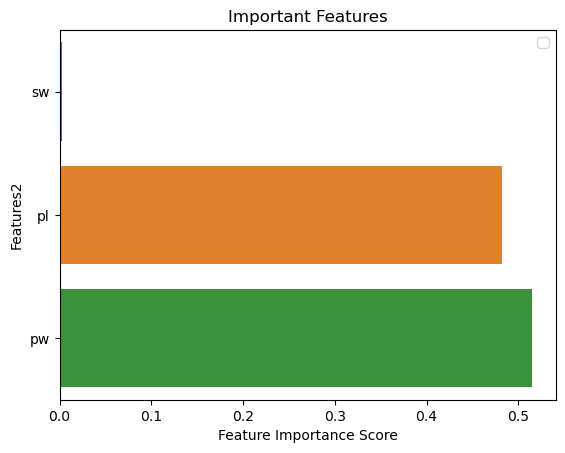

In [35]:
sns.barplot(x=feature_important, y=feature_important.index)


plt.xlabel('Feature Importance Score')
plt.ylabel('Features2')
plt.title("Important Features")
plt.legend()
plt.show()

### Que constatez vous ? 

L'accuracy de notre classificateur reste avec une fiabilité supérieure à 90% 
même en réduisant légèrement le nombre de features
Les histogrammes nous le schématisent très bien
Notre échantillonnage est cohérent avec la fiabilité des tests et des entraînements.
Nous pouvons conclure que les espèces les plus recherchées sont pl ert pw